In [96]:
import numpy as np
import pandas as pd
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Taran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
844,ham,K.k:)when are you going?,NaN,NaN,NaN
5392,ham,Ooooooh I forgot to tell u I can get on yovill...,NaN,NaN,NaN
1204,spam,WIN a year supply of CDs 4 a store of ur choic...,NaN,NaN,NaN
2994,ham,Mm not entirely sure i understood that text bu...,NaN,NaN,NaN
1843,ham,Super da:)good replacement for murali,NaN,NaN,NaN


In [10]:
df.shape


(5572, 5)

# 1 Data Cleaning

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [12]:
# removing the last three columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)

,v1,v2
3649,ham,"We are hoping to get away by 7, from Langport...."
2412,spam,I don't know u and u don't know me. Send CHAT ...
1614,ham,Me sef dey laugh you. Meanwhile how's my darli...
1772,ham,Good afternoon sexy buns! How goes the job sea...
1718,ham,"As in missionary hook up, doggy hook up, stand..."


In [13]:
# renamimg the columns
df.rename(columns={'v1':"Target","v2":"Text"},inplace=True)
df.sample(5)

,Target,Text
630,ham,Please dont say like that. Hi hi hi
4322,ham,Aight well keep me informed
660,ham,"Under the sea, there lays a rock. In the rock,..."
2961,ham,"\NONE!NOWHERE IKNO DOESDISCOUNT!SHITINNIT\"""""
1355,ham,Convey my regards to him


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  5572 non-null   object
 1   Text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [15]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [16]:
df['Target']=encoder.fit_transform(df['Target'])

In [17]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [19]:
df.duplicated().sum()

403

In [20]:
df=df.drop_duplicates(keep='first')

In [21]:
df.duplicated().sum()

0

In [22]:
df.shape

(5169, 2)

# 2. EDA

In [23]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

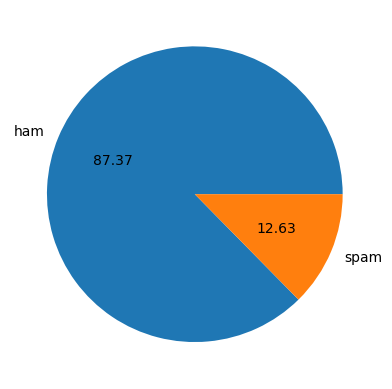

In [25]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [26]:
# Data is imbalanced

In [27]:
import nltk

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Taran\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
df['num_characters']=df['Text'].apply(len)

In [30]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
# number of words

In [32]:
df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [33]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [34]:
df['num_sentences']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [35]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [36]:
# ham
df[df['Target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [37]:
# spma
df[df['Target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [38]:
import seaborn as sns

C:\Users\Taran\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Taran\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

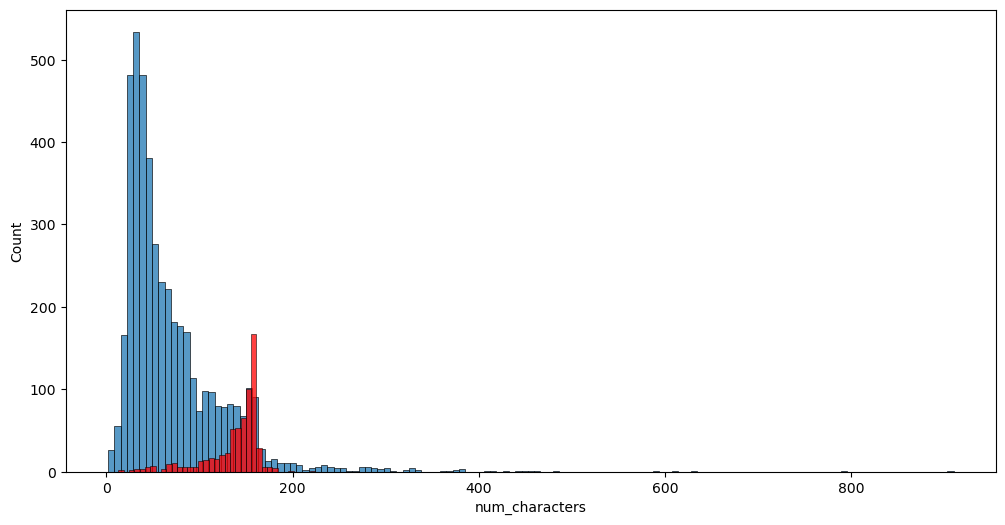

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='red')

C:\Users\Taran\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Taran\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

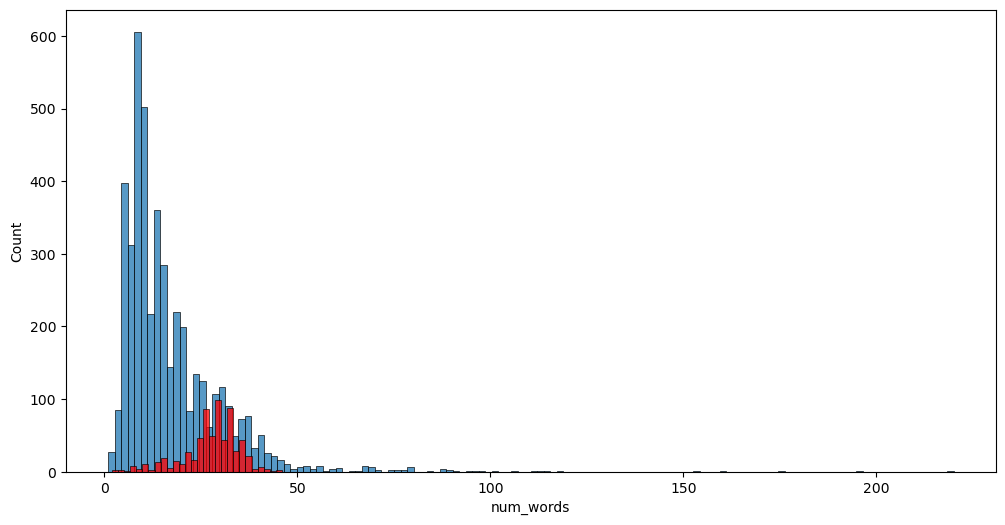

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='red')

C:\Users\Taran\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Taran\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Taran\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


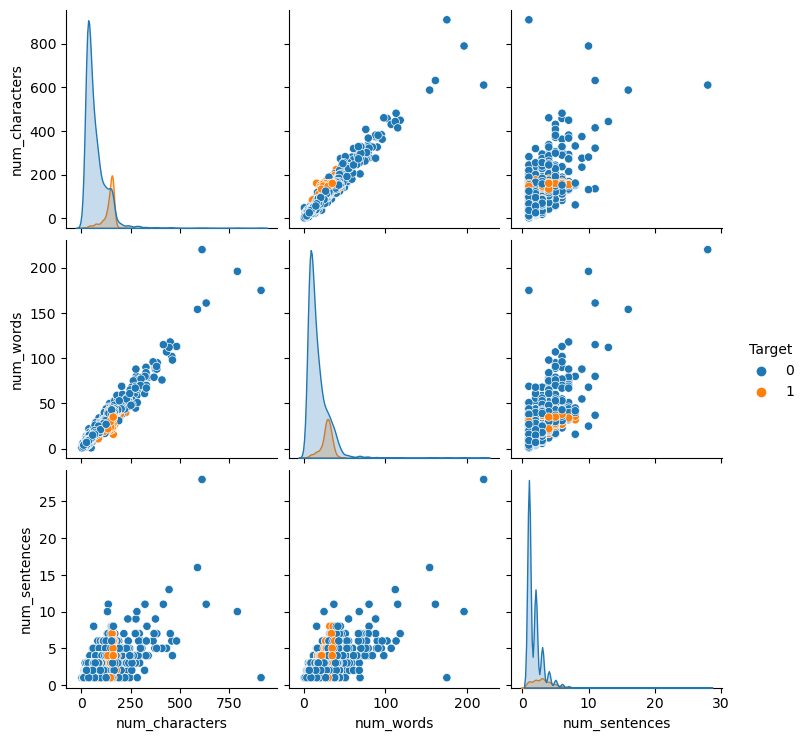

In [41]:
sns.pairplot(df,hue='Target')

<Axes: >

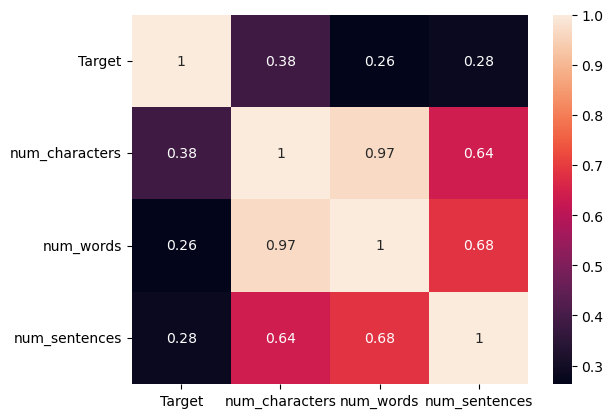

In [42]:
numerics=df.select_dtypes(include=['int64','int32'])
sns.heatmap(numerics.corr(),annot=True)

# 3. Data Preprocessing
   ##### 1. Lower Case
   ##### 2. Tokenization
   ##### 3. Removing special characters
   ##### 4. Removing stop words and punctuation
   ##### 5. Stemming
   

In [43]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y.copy()
    y.clear()
    
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
            
    text=y.copy()
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [44]:
df['Transformed_text']=df['Text'].apply(transform_text)
df.head()

,Target,Text,num_characters,num_words,num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


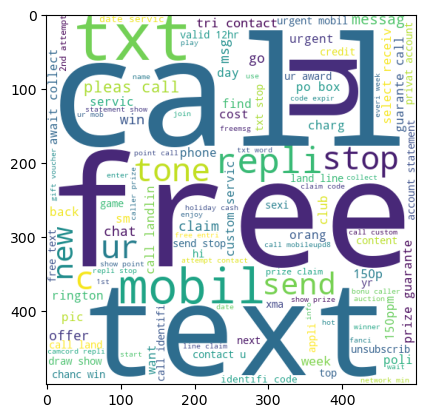

In [45]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc=wc.generate(df[df['Target']==1]['Transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

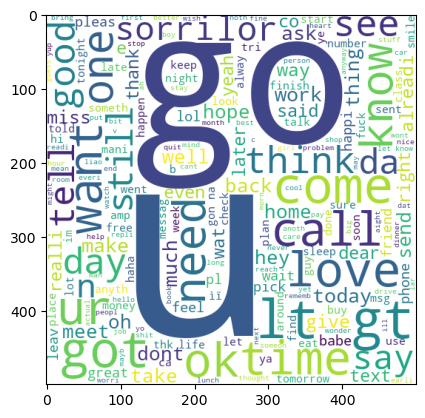

In [46]:
ham_wc=wc.generate(df[df['Target']==0]['Transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

In [47]:
spam_c=[]
for msg in df[df['Target']==1]['Transformed_text'].tolist():
    for word in msg.split():
        spam_c.append(word)

In [48]:
len(spam_c)

9939

In [91]:
from collections import Counter
counter = Counter(spam_c)
common_elements = counter.most_common(30)
df_common_elements = pd.DataFrame(common_elements, columns=['Element', 'Count'])

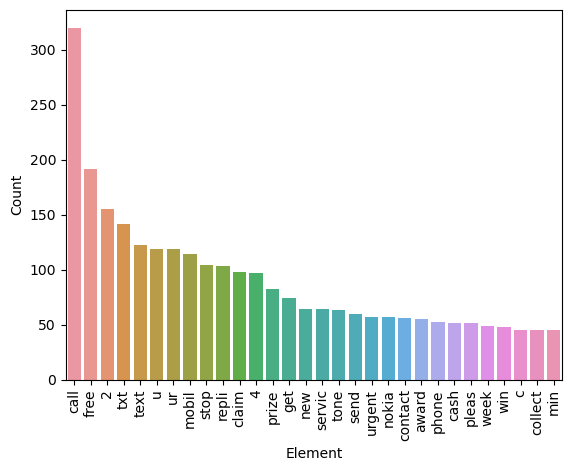

In [92]:
from collections import Counter
sns.barplot(x='Element', y='Count', data=df_common_elements)
plt.xticks(rotation='vertical')
plt.show()

In [50]:
ham_c=[]
for msg in df[df['Target']==0]['Transformed_text'].tolist():
    for word in msg.split():
        ham_c.append(word)

In [51]:
len(ham_c)

35394

In [94]:
counter = Counter(ham_c)
common_elements = counter.most_common(30)
df_common_elements = pd.DataFrame(common_elements, columns=['Element', 'Count'])

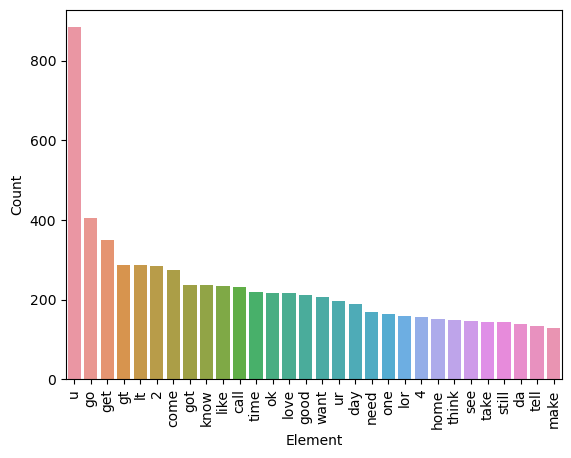

In [95]:
sns.barplot(x='Element', y='Count', data=df_common_elements)
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building


In [53]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [54]:
X = tfidf.fit_transform(df['Transformed_text']).toarray()

In [55]:
X.shape

(5169, 3000)

In [56]:
y=df['Target'].values

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [59]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [60]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [61]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [62]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [63]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [65]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [66]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [67]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [68]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [69]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.92
For  xgb
Accuracy -  0.9661508704061895
Precision -  0.9256198347107438


In [70]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.966151,0.925620
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188


In [71]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.974855
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.966151
8,GBDT,Accuracy,0.947776
9,BgC,Accuracy,0.957447


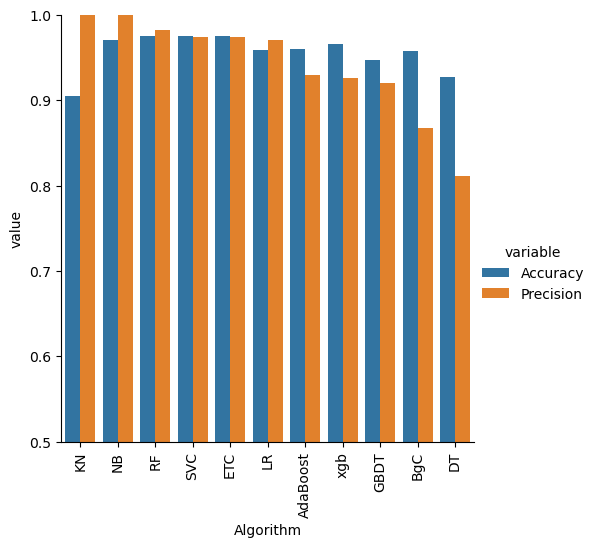

In [72]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [73]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [75]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [76]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [77]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [78]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [79]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,xgb,0.966151,0.925620,0.966151,0.925620,0.966151,0.925620,0.966151,0.925620
8,GBDT,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000
9,BgC,0.957447,0.867188,0.957447,0.867188,0.957447,0.867188,0.957447,0.867188


In [80]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [81]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [82]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [83]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [84]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [86]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import StackingClassifier

In [87]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [88]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9398496240601504


In [89]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))